In [192]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

from scipy.integrate import trapezoid

In [193]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [194]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [195]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [196]:
folder_path = Path("c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/sa_base")

In [197]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [198]:
# comp_times = []
# timestep_ids = []
# timestamps = []

# i = 1

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     comp_time = ds.cumulative_computational_time.values
#     timestep_id = ds.timestep_id.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     comp_times.append(comp_time)
#     timestep_ids.append(timestep_id)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# comp_times = np.array(comp_times)
# timestep_ids = np.array(timestep_ids)
# timestamps = np.array(timestamps)
    
# np.savetxt('sa_base_computation-times.txt', comp_times)
# np.savetxt('sa_base_timestep-ids.txt', timestep_ids)
# np.savetxt('sa_base_timestamps.txt', timestamps)

comp_times = np.loadtxt('sa_base_computation-times.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt('sa_base_timestamps.txt', ))

In [199]:
xbeach_times = np.loadtxt(os.path.join(folder_path, os.path.join(folder_path, Path("xbeach_times.txt"))))[::12]

In [200]:
gradient = np.gradient(comp_times, np.float32(timestamps))

avg_gradient = np.mean(gradient)

xbeach_activation_gradient = (gradient > avg_gradient)

date_pairs = []

for i in range(len(xbeach_activation_gradient)):
    
    if xbeach_activation_gradient[i] == 1 and xbeach_activation_gradient[i-1] == 0:
        date1 = timestamps[i]
        
        for j in range(len(xbeach_activation_gradient[i:])):
            if xbeach_activation_gradient[i:][j+1] == 0:
                
                date2 = timestamps[i:][j]
                                
                date_pairs.append((date1, date2))
                
                break
            
    
print(date_pairs)

[(Timestamp('2017-06-24 12:00:00'), Timestamp('2017-06-26 12:00:00')), (Timestamp('2017-07-09 00:00:00'), Timestamp('2017-07-09 12:00:00')), (Timestamp('2017-07-16 00:00:00'), Timestamp('2017-07-16 12:00:00')), (Timestamp('2017-07-21 00:00:00'), Timestamp('2017-07-26 12:00:00')), (Timestamp('2017-07-30 00:00:00'), Timestamp('2017-07-30 12:00:00')), (Timestamp('2017-08-01 12:00:00'), Timestamp('2017-08-03 00:00:00')), (Timestamp('2017-08-06 00:00:00'), Timestamp('2017-08-06 12:00:00')), (Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-13 12:00:00')), (Timestamp('2017-08-20 00:00:00'), Timestamp('2017-08-20 12:00:00')), (Timestamp('2017-09-17 00:00:00'), Timestamp('2017-09-17 12:00:00')), (Timestamp('2017-09-29 12:00:00'), Timestamp('2017-10-01 00:00:00')), (Timestamp('2017-10-07 12:00:00'), Timestamp('2017-10-08 12:00:00')), (Timestamp('2017-11-03 00:00:00'), Timestamp('2017-11-04 00:00:00')), (Timestamp('2018-07-01 00:00:00'), Timestamp('2018-07-01 12:00:00')), (Timestamp('2018-07

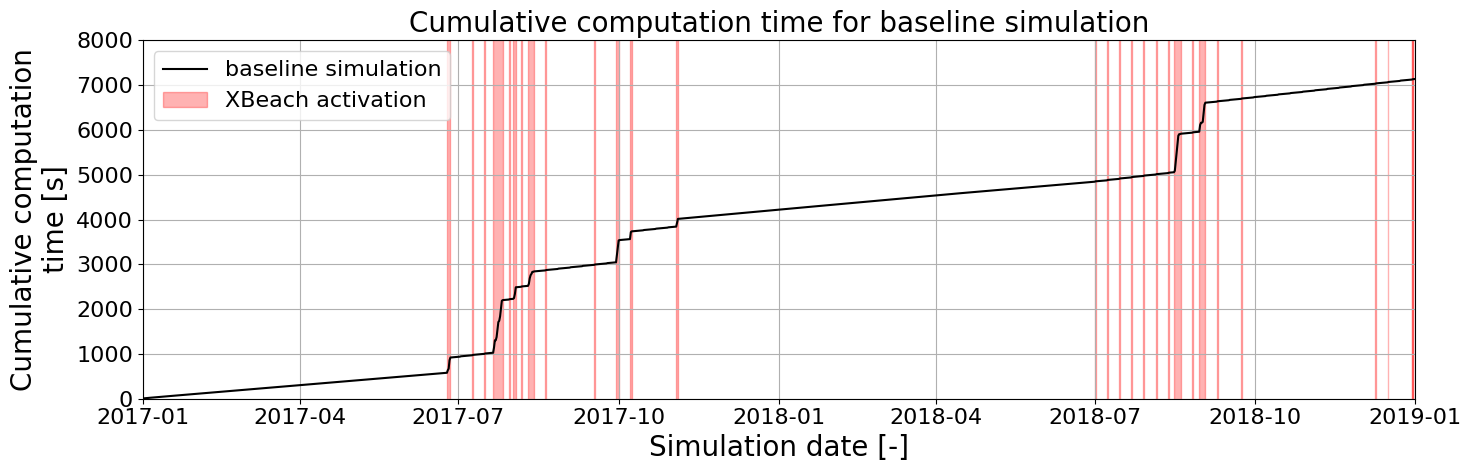

In [201]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(timestamps, comp_times, color='k', label='baseline simulation')

nonzero_mask = np.nonzero(xbeach_times)

# for i in xbeach_activation_gradient:
#     if date2 - date1 <= pd.to_timedelta("24h"):
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

for date1, date2 in date_pairs:
    ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')
        
ax.fill_between([0, 0], 0, 0, alpha=0.3, label='XBeach activation', color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Cumulative computation\ntime [s]')

ax.set_title("Cumulative computation time for baseline simulation")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2019-01-01")))
ax.set_ylim((0, 8000))

ax.grid()

ax.legend()

fig.tight_layout()

figname = 'computational_time_sa_base.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [202]:
total_comp_time = comp_times[-1]
total_xbeach_comp_time = 0

total_sim_time = 2 * 3600 * 24 * 365.25
total_xbeach_time = 0


for date1, date2 in date_pairs:

    dt = date2 - date1
    
    print(date1)
    print(date2)
        
    arg1 = np.argwhere(date1 == timestamps)
    arg2 = np.argwhere(date2 == timestamps)
    
    # print(arg1)
    
    comp_time = comp_times[arg2][0] - comp_times[arg1][0]
    
    total_xbeach_comp_time += comp_time
    total_xbeach_time += dt.total_seconds()
    
relative_xbeach_time = total_xbeach_time / total_sim_time
relative_xbeach_comp_time = (total_xbeach_comp_time / total_comp_time)[0]

2017-06-24 12:00:00
2017-06-26 12:00:00
2017-07-09 00:00:00
2017-07-09 12:00:00
2017-07-16 00:00:00
2017-07-16 12:00:00
2017-07-21 00:00:00
2017-07-26 12:00:00
2017-07-30 00:00:00
2017-07-30 12:00:00
2017-08-01 12:00:00
2017-08-03 00:00:00
2017-08-06 00:00:00
2017-08-06 12:00:00
2017-08-10 00:00:00
2017-08-13 12:00:00
2017-08-20 00:00:00
2017-08-20 12:00:00
2017-09-17 00:00:00
2017-09-17 12:00:00
2017-09-29 12:00:00
2017-10-01 00:00:00
2017-10-07 12:00:00
2017-10-08 12:00:00
2017-11-03 00:00:00
2017-11-04 00:00:00
2018-07-01 00:00:00
2018-07-01 12:00:00
2018-07-08 00:00:00
2018-07-08 12:00:00
2018-07-15 00:00:00
2018-07-15 12:00:00
2018-07-22 00:00:00
2018-07-22 12:00:00
2018-07-29 00:00:00
2018-07-29 12:00:00
2018-08-05 00:00:00
2018-08-05 12:00:00
2018-08-12 00:00:00
2018-08-12 12:00:00
2018-08-15 12:00:00
2018-08-19 12:00:00
2018-08-26 00:00:00
2018-08-26 12:00:00
2018-08-30 00:00:00
2018-09-02 12:00:00
2018-09-09 00:00:00
2018-09-09 12:00:00
2018-09-23 00:00:00
2018-09-23 12:00:00


In [203]:
# print(relative_xbeach_time)
# print(relative_xbeach_comp_time)

print("total comp. time: ", total_comp_time / 3600, " [h]")
print("xbeach sim time: ", relative_xbeach_time * 100, ' %')
print("xbeach comp. time: ", relative_xbeach_comp_time * 100, '%')


total comp. time:  1.9822256001498963  [h]
xbeach sim time:  4.4490075290896645  %
xbeach comp. time:  64.39341607762736 %


In [204]:
xbeach_times = np.loadtxt(os.path.join(folder_path, Path("xbeach_times.txt")))
all_timestamps = pd.to_datetime(np.loadtxt(os.path.join(folder_path, Path("timestamps.txt"))))

date_pairs = []

for i in range(len(xbeach_times)):
    
    if xbeach_times[i] >= 1 and xbeach_times[i-1] == 0:
        date1 = all_timestamps[i]
        
        for j in range(len(xbeach_times[i:])-1):
            if xbeach_times[i:][j] >= 1 and xbeach_times[i:][j+1] == 0:

                date2 = all_timestamps[i:][j]
                
                if date2 - date1 > pd.Timedelta('1h'):
                
                    date_pairs.append((date1, date2))
                
                break
                    
            
    
print(date_pairs)

[(Timestamp('2017-06-25 11:00:00'), Timestamp('2017-06-25 13:00:00')), (Timestamp('2017-06-25 17:00:00'), Timestamp('2017-06-26 01:00:00')), (Timestamp('2017-07-21 04:00:00'), Timestamp('2017-07-21 22:00:00')), (Timestamp('2017-07-22 19:00:00'), Timestamp('2017-07-24 00:00:00')), (Timestamp('2017-07-24 19:00:00'), Timestamp('2017-07-25 17:00:00')), (Timestamp('2017-07-25 19:00:00'), Timestamp('2017-07-26 00:00:00')), (Timestamp('2017-08-02 12:00:00'), Timestamp('2017-08-02 22:00:00')), (Timestamp('2017-08-10 08:00:00'), Timestamp('2017-08-10 14:00:00')), (Timestamp('2017-08-10 18:00:00'), Timestamp('2017-08-11 02:00:00')), (Timestamp('2017-08-11 10:00:00'), Timestamp('2017-08-11 14:00:00')), (Timestamp('2017-08-11 23:00:00'), Timestamp('2017-08-12 02:00:00')), (Timestamp('2017-09-29 12:00:00'), Timestamp('2017-09-30 21:00:00')), (Timestamp('2017-10-07 18:00:00'), Timestamp('2017-10-08 00:00:00')), (Timestamp('2017-11-03 06:00:00'), Timestamp('2017-11-03 18:00:00')), (Timestamp('2018-08

In [205]:
runid = "sa_base"
folder_path = Path("c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/sa_base")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_base
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840

In [206]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [207]:
# total_volume_in_upper_bluff = []
# timestamps = []

# i = 1

# # reference variables
# max_distance_from_top = 5  # m
# N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)

In [208]:
runid = "sa_lvl2_15"

folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_lvl2_15
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000

In [209]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [210]:
# total_volume_in_upper_bluff = []
# timestamps = []

# i = 1

# # reference variables
# max_distance_from_top = 5  # m
# N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)

In [211]:
comp_times = np.loadtxt('sa_base_computation-times.txt')
total_volume_in_upper_bluff_base = np.loadtxt('sa_base_total_volume_in_upper_bluff.txt')
total_volume_in_upper_bluff_lvl2_15 = np.loadtxt('sa_lvl2_15_total_volume_in_upper_bluff.txt')
total_volume_in_upper_bluff_lvl2_16 = np.loadtxt('sa_lvl2_16_total_volume_in_upper_bluff.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt("sa_base_timestamps.txt"))

In [212]:
volume_start = total_volume_in_upper_bluff_base[0]

volume_loss_base = volume_start - total_volume_in_upper_bluff_base
volume_loss_lvl2_15 = volume_start - total_volume_in_upper_bluff_lvl2_15
volume_loss_lvl2_16 = volume_start - total_volume_in_upper_bluff_lvl2_16

print(volume_loss_base)
print(volume_loss_lvl2_16)

[ 0.          0.          0.         ... 19.68266347 19.68266347
 19.68266347]
[ 0.          0.          0.         ... 22.66296187 22.66296187
 22.66296187]


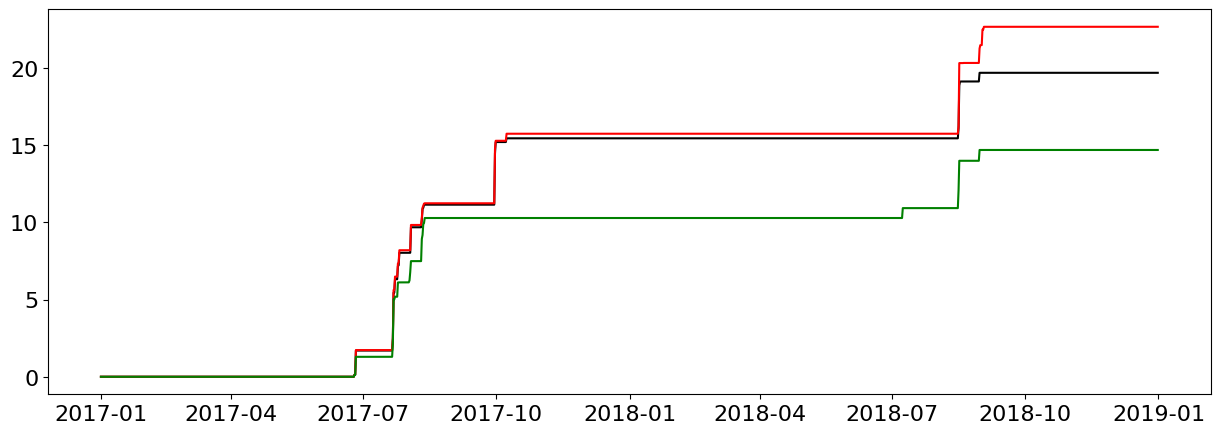

In [213]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, volume_loss_base, color='k')
l2, = ax.plot(timestamps, volume_loss_lvl2_16, color='r')
l3, = ax.plot(timestamps, volume_loss_lvl2_15, color='g')

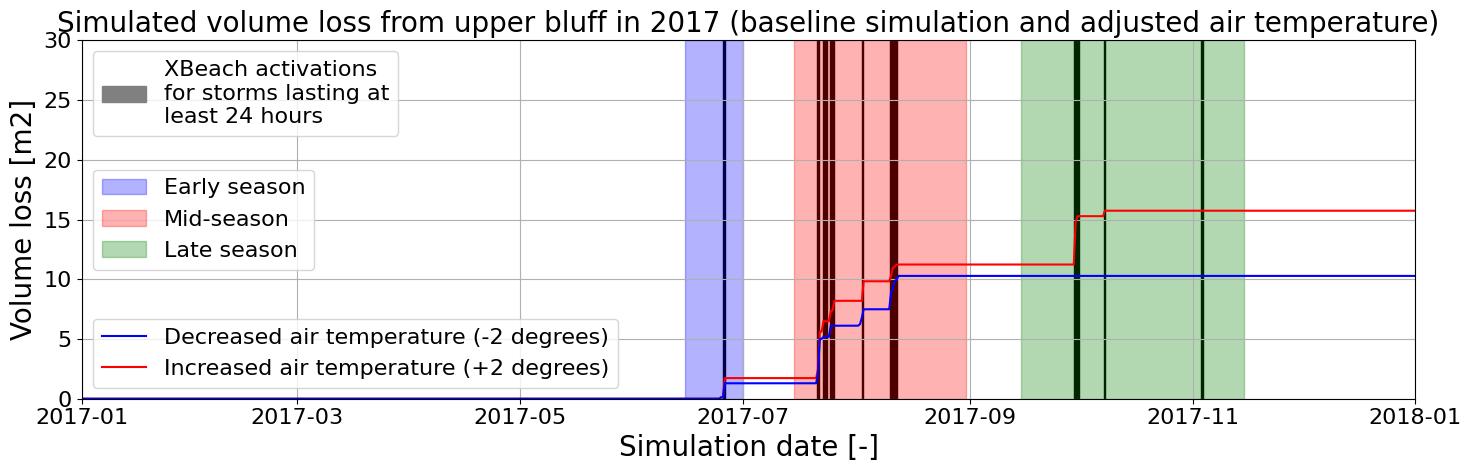

In [233]:
fig, ax = plt.subplots(figsize=(15, 5))

# l1, = ax.plot(timestamps, volume_loss_base, color='k')
l2, = ax.plot(timestamps, volume_loss_lvl2_16, color='r')
l3, = ax.plot(timestamps, volume_loss_lvl2_15, color='b')

# for date1, date2 in date_pairs:
#     if date1 > pd.to_datetime("2017-09-01") and date1 < pd.to_datetime("2017-12-01"):
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='g')
#     elif date1 < pd.to_datetime("2017-07-01"):
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='b')
#     else:
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

# p2 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Early season storm', color='b')
# p1 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Mid-season storm', color='r')
# p3 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Late season storm', color='g')

# ax.fill_between([pd.to_datetime("2018-07-08"), pd.to_datetime("2018-07-09")], -2000, 20000, alpha=0.3, color='b')

for date1, date2 in date_pairs:
    if date1 > pd.to_datetime("2017-09-01") and date1 < pd.to_datetime("2017-12-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=1, color='k')
    elif date1 < pd.to_datetime("2017-07-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=1, color='k')
    else:
        ax.fill_between([date1, date2], -2000, 20000, alpha=1, color='k')

p2 = ax.fill_between([pd.to_datetime("2017-06-15"), pd.to_datetime("2017-07-01")], 0, 30, alpha=0.3, label='Early season', color='b')
p1 = ax.fill_between([pd.to_datetime("2017-07-15"), pd.to_datetime("2017-08-31")], 0, 30, alpha=0.3, label='Mid-season', color='r')
p3 = ax.fill_between([pd.to_datetime("2017-09-15"), pd.to_datetime("2017-11-15")], 0, 30, alpha=0.3, label='Late season', color='g')

p4 = ax.fill_between([0, 0], 0, 0, alpha=1, label="XBeach activations\nfor storms lasting at\nleast 24 hours", color='grey')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Volume loss [m2]')

ax.set_title("Simulated volume loss from upper bluff in 2017 (baseline simulation and adjusted air temperature)")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2018-01-01")))
ax.set_ylim((0, 30))

ax.grid()

# leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Increased temperature (+2 degrees)', 'Decreased temperature (-2 degrees)'], loc='lower left')
# leg1 = ax.legend([l1, l3, l2], ['Baseline', 'Decreased air temperature (-2 degrees)', 'Increased air temperature (+2 degrees)'], loc='lower left')
leg1 = ax.legend([l3, l2], ['Decreased air temperature (-2 degrees)', 'Increased air temperature (+2 degrees)'], loc='lower left')
leg2 = ax.legend([p2, p1, p3], [p.get_label() for p in [p2, p1, p3]], loc='center left')
leg3 = ax.legend([p4], [p.get_label() for p in [p4]], loc='upper left', alignment='left')

ax.add_artist(leg1)
ax.add_artist(leg2)

fig.tight_layout()

figname = 'volume_loss_sa_base.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [215]:
print(xbeach_times)

[0. 0. 0. ... 0. 0. 0.]


In [216]:
runid = "sa_base"

folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_base
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840

In [217]:
# maximum_thaw_depth = []
# mean_thaw_depth = []
# timestamps = []

# i = 1

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
#     thaw_depth = ds.thaw_depth.values
    
#     ds.close()
    
#     maximum_thaw_depth.append(np.max(thaw_depth))
#     mean_thaw_depth.append(np.mean(thaw_depth))
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# maximum_thaw_depth = np.array(maximum_thaw_depth)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_maximum_thaw_depth.txt', maximum_thaw_depth)
# np.savetxt(f'{runid}_mean_thaw_depth.txt', mean_thaw_depth)


In [218]:
runid = "sa_lvl1_57"

folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_lvl1_57
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000

In [ ]:
# maximum_thaw_depth = []
# mean_thaw_depth = []
# timestamps = []

# i = 1

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
#     thaw_depth = ds.thaw_depth.values
    
#     ds.close()
    
#     maximum_thaw_depth.append(np.max(thaw_depth))
#     mean_thaw_depth.append(np.mean(thaw_depth))
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# maximum_thaw_depth = np.array(maximum_thaw_depth)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_maximum_thaw_depth.txt', maximum_thaw_depth)
# np.savetxt(f'{runid}_mean_thaw_depth.txt', mean_thaw_depth)


finished 1/1460
finished 2/1460
finished 3/1460
finished 4/1460
finished 5/1460
finished 6/1460
finished 7/1460
finished 8/1460
finished 9/1460
finished 10/1460
finished 11/1460
finished 12/1460
finished 13/1460
finished 14/1460
finished 15/1460
finished 16/1460
finished 17/1460
finished 18/1460
finished 19/1460
finished 20/1460
finished 21/1460
finished 22/1460
finished 23/1460
finished 24/1460
finished 25/1460
finished 26/1460
finished 27/1460
finished 28/1460
finished 29/1460
finished 30/1460
finished 31/1460
finished 32/1460
finished 33/1460
finished 34/1460
finished 35/1460
finished 36/1460
finished 37/1460
finished 38/1460
finished 39/1460
finished 40/1460
finished 41/1460
finished 42/1460
finished 43/1460
finished 44/1460
finished 45/1460
finished 46/1460
finished 47/1460
finished 48/1460
finished 49/1460
finished 50/1460
finished 51/1460
finished 52/1460
finished 53/1460
finished 54/1460
finished 55/1460
finished 56/1460
finished 57/1460
finished 58/1460
finished 59/1460
finish

In [220]:
runid = "sa_lvl1_58"

folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_lvl1_58
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000

In [ ]:
# maximum_thaw_depth = []
# mean_thaw_depth = []
# timestamps = []

# i = 1

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
#     thaw_depth = ds.thaw_depth.values
    
#     ds.close()
    
#     maximum_thaw_depth.append(np.max(thaw_depth))
#     mean_thaw_depth.append(np.mean(thaw_depth))
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# maximum_thaw_depth = np.array(maximum_thaw_depth)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_maximum_thaw_depth.txt', maximum_thaw_depth)
# np.savetxt(f'{runid}_mean_thaw_depth.txt', mean_thaw_depth)


finished 1/1460
finished 2/1460
finished 3/1460
finished 4/1460
finished 5/1460
finished 6/1460
finished 7/1460
finished 8/1460
finished 9/1460
finished 10/1460
finished 11/1460
finished 12/1460
finished 13/1460
finished 14/1460
finished 15/1460
finished 16/1460
finished 17/1460
finished 18/1460
finished 19/1460
finished 20/1460
finished 21/1460
finished 22/1460
finished 23/1460
finished 24/1460
finished 25/1460
finished 26/1460
finished 27/1460
finished 28/1460
finished 29/1460
finished 30/1460
finished 31/1460
finished 32/1460
finished 33/1460
finished 34/1460
finished 35/1460
finished 36/1460
finished 37/1460
finished 38/1460
finished 39/1460
finished 40/1460
finished 41/1460
finished 42/1460
finished 43/1460
finished 44/1460
finished 45/1460
finished 46/1460
finished 47/1460
finished 48/1460
finished 49/1460
finished 50/1460
finished 51/1460
finished 52/1460
finished 53/1460
finished 54/1460
finished 55/1460
finished 56/1460
finished 57/1460
finished 58/1460
finished 59/1460
finish

In [222]:
maximum_thaw_depth_base = np.loadtxt("sa_base_maximum_thaw_depth.txt")
maximum_thaw_depth_sa_lvl1_49 = np.loadtxt("sa_lvl1_49_maximum_thaw_depth.txt")
maximum_thaw_depth_sa_lvl1_50 = np.loadtxt("sa_lvl1_50_maximum_thaw_depth.txt")

mean_thaw_depth_base = np.loadtxt("sa_base_mean_thaw_depth.txt")
mean_thaw_depth_sa_lvl1_49 = np.loadtxt("sa_lvl1_49_mean_thaw_depth.txt")
mean_thaw_depth_sa_lvl1_50 = np.loadtxt("sa_lvl1_50_mean_thaw_depth.txt")

timestamps = pd.to_datetime(np.loadtxt("sa_base_timestamps.txt"))

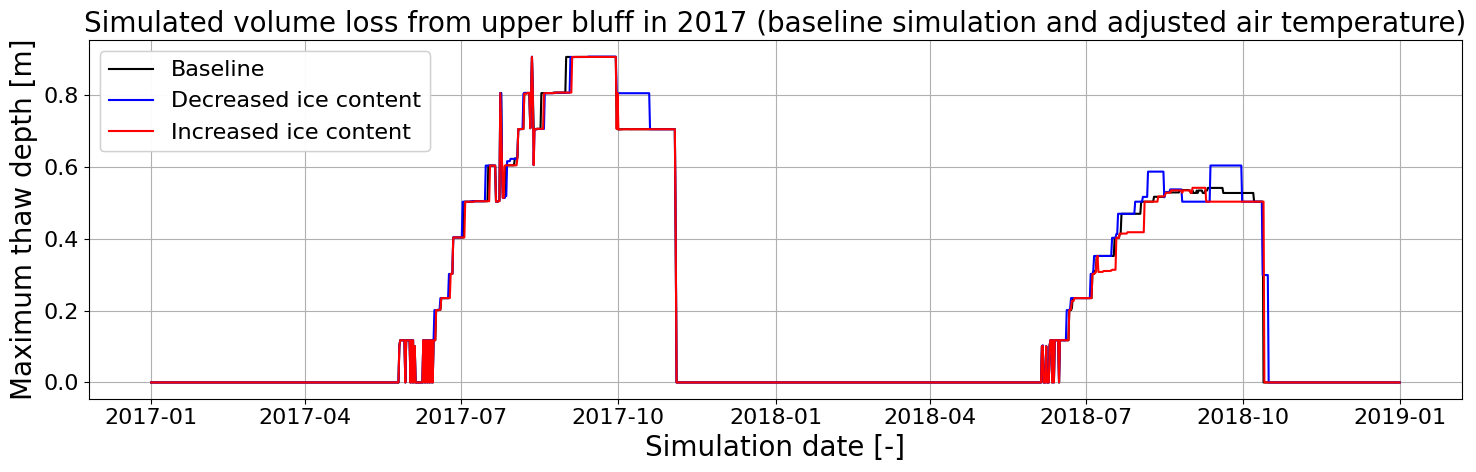

In [223]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, maximum_thaw_depth_base, color='k')
l2, = ax.plot(timestamps, maximum_thaw_depth_sa_lvl1_49, color='b')
l3, = ax.plot(timestamps, maximum_thaw_depth_sa_lvl1_50, color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Maximum thaw depth [m]')

ax.set_title("Simulated volume loss from upper bluff in 2017 (baseline simulation and adjusted air temperature)")

# ax.set_xlim((pd.|to_datetime("2018-10-01"), pd.to_datetime("2019-01-01")))

ax.grid()

leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Decreased ice content', 'Increased ice content'], loc='upper left')

ax.add_artist(leg1)

fig.tight_layout()

figname = 'maximum_thaw_depth_timeseries_icecontent.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

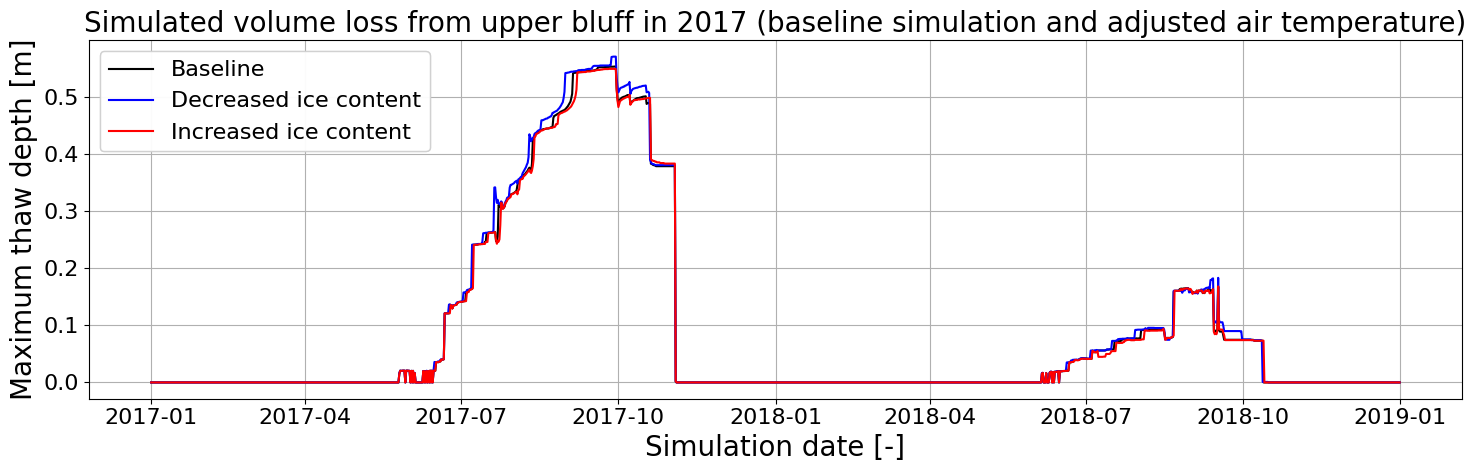

In [224]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, mean_thaw_depth_base, color='k')
l2, = ax.plot(timestamps, mean_thaw_depth_sa_lvl1_49, color='b')
l3, = ax.plot(timestamps, mean_thaw_depth_sa_lvl1_50, color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Maximum thaw depth [m]')

ax.set_title("Simulated volume loss from upper bluff in 2017 (baseline simulation and adjusted air temperature)")

# ax.set_xlim((pd.to_datetime("2018-10-01"), pd.to_datetime("2019-01-01")))

ax.grid()

leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Decreased ice content', 'Increased ice content'], loc='upper left')

ax.add_artist(leg1)

fig.tight_layout()

figname = 'mean_thaw_depth_timeseries_icecontent.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [225]:
maximum_thaw_depth_base = np.loadtxt("sa_base_maximum_thaw_depth.txt")
maximum_thaw_depth_sa_lvl1_57 = np.loadtxt("sa_lvl1_57_maximum_thaw_depth.txt")
maximum_thaw_depth_sa_lvl1_58 = np.loadtxt("sa_lvl1_58_maximum_thaw_depth.txt")

mean_thaw_depth_base = np.loadtxt("sa_base_mean_thaw_depth.txt")
mean_thaw_depth_sa_lvl1_57 = np.loadtxt("sa_lvl1_57_mean_thaw_depth.txt")
mean_thaw_depth_sa_lvl1_58 = np.loadtxt("sa_lvl1_58_mean_thaw_depth.txt")

timestamps = pd.to_datetime(np.loadtxt("sa_base_timestamps.txt"))

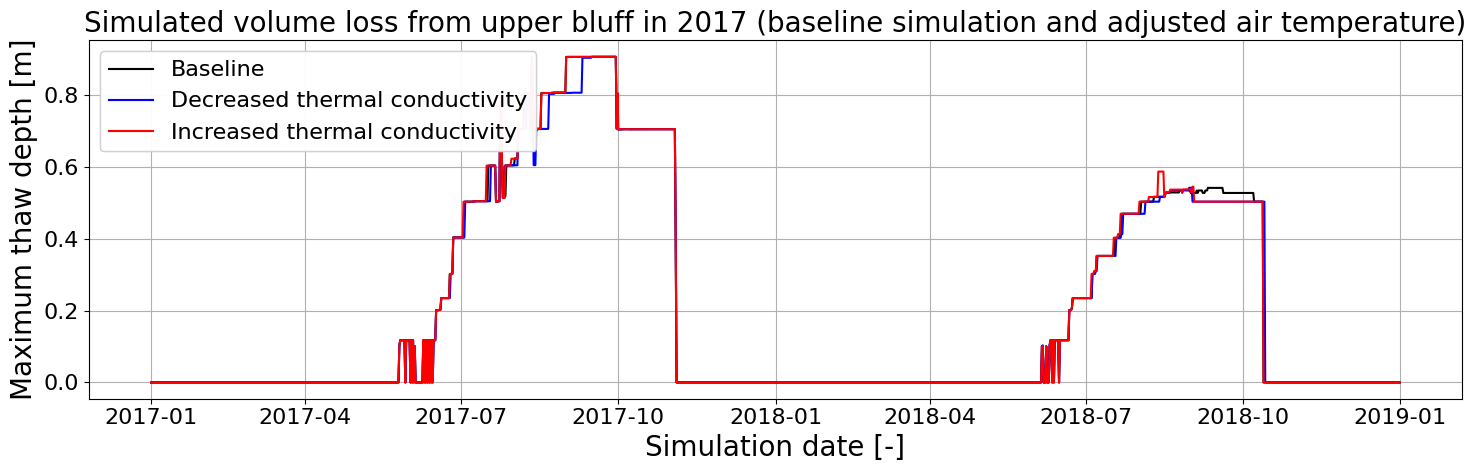

In [226]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, maximum_thaw_depth_base, color='k')
l2, = ax.plot(timestamps, maximum_thaw_depth_sa_lvl1_57, color='b')
l3, = ax.plot(timestamps, maximum_thaw_depth_sa_lvl1_58, color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Maximum thaw depth [m]')

ax.set_title("Simulated volume loss from upper bluff in 2017 (baseline simulation and adjusted air temperature)")

# ax.set_xlim((pd.|to_datetime("2018-10-01"), pd.to_datetime("2019-01-01")))

ax.grid()

leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Decreased thermal conductivity', 'Increased thermal conductivity'], loc='upper left')

ax.add_artist(leg1)

fig.tight_layout()

figname = 'maximum_thaw_depth_timeseries_thermalconductivity.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

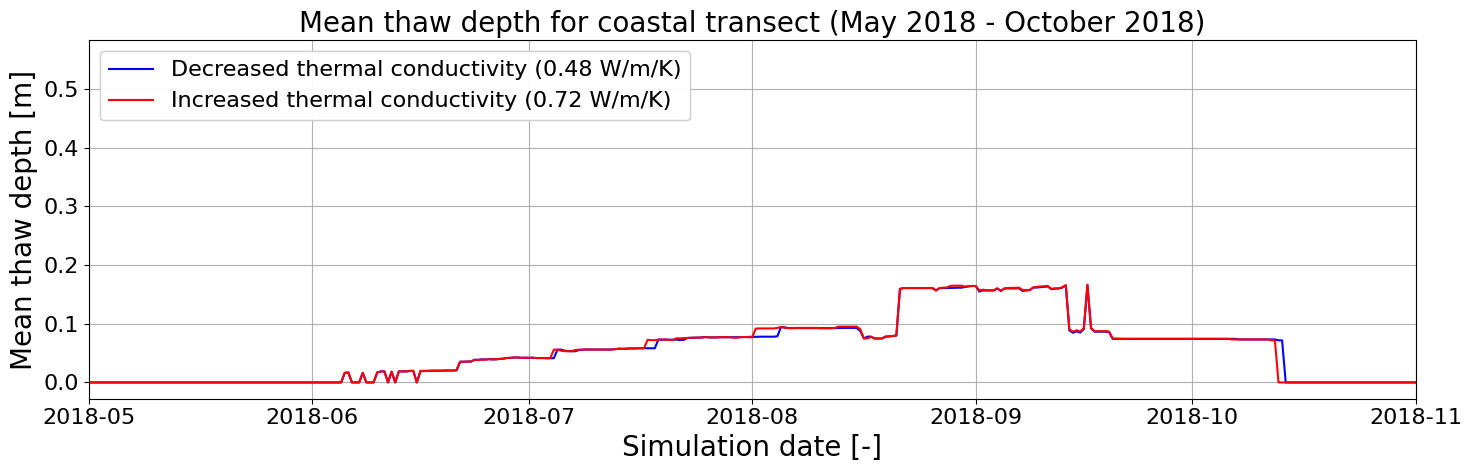

In [232]:
fig, ax = plt.subplots(figsize=(15, 5))

# l1, = ax.plot(timestamps, mean_thaw_depth_base, color='k')
l2, = ax.plot(timestamps, mean_thaw_depth_sa_lvl1_57, color='b')
l3, = ax.plot(timestamps, mean_thaw_depth_sa_lvl1_58, color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Mean thaw depth [m]')

ax.set_title("Mean thaw depth for coastal transect (May 2018 - October 2018)")

ax.set_xlim((pd.to_datetime("2018-05-01"), pd.to_datetime("2018-11-01")))

ax.grid()

# leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Decreased thermal conductivity', 'Increased thermal conductivity'], loc='upper left')
leg1 = ax.legend([l2, l3], ['Decreased thermal conductivity (0.48 W/m/K)', 'Increased thermal conductivity (0.72 W/m/K)'], loc='upper left')

ax.add_artist(leg1)

fig.tight_layout()

figname = 'mean_thaw_depth_timeseries_thermalconductivity.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)